In [100]:
from sklearn.datasets import load_wine
import pandas as pd

In [101]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns = wine.feature_names)
y = pd.Series(wine.target)

In [102]:
print(X.isna().any().any())
print(y.isna().any())

False
False


In [103]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123, stratify = y)

In [106]:
# posto koristimo KNN, moramo da normalizujemo podatke, jer se koristi euklidsko rastojanje
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler = MinMaxScaler()
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [108]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
params = {
    "n_neighbors" : [2, 3, 4, 5, 6, 7],
    "weights" : ['uniform', 'distance']
}

In [113]:
gs = GridSearchCV(KNeighborsClassifier(), params, cv = 5, verbose = 4)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.963 total time=   0.0s
[CV 2/5] END ....n_neighbors=2, weights=uniform;, score=0.926 total time=   0.0s
[CV 3/5] END ....n_neighbors=2, weights=uniform;, score=0.963 total time=   0.0s
[CV 4/5] END ....n_neighbors=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 5/5] END ....n_neighbors=2, weights=uniform;, score=0.962 total time=   0.0s
[CV 1/5] END ...n_neighbors=2, weights=distance;, score=0.963 total time=   0.0s
[CV 2/5] END ...n_neighbors=2, weights=distance;, score=0.926 total time=   0.0s
[CV 3/5] END ...n_neighbors=2, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5] END ...n_neighbors=2, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5] END ...n_neighbors=2, weights=distance;, score=1.000 total time=   0.0s
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.963 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [2, 3, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,4
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,2


In [114]:
knn = gs.best_estimator_
knn

,n_neighbors,2
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
pd.DataFrame(confusion_matrix(y_train, knn.predict(X_train)))

,0,1,2
0,44,0,0
1,0,53,0
2,0,0,36


In [117]:
pd.DataFrame(confusion_matrix(y_test, knn.predict(X_test)))

,0,1,2
0,15,0,0
1,3,14,1
2,0,1,11


In [118]:
# kada bi k bio jednak velicini skupa za obucavanje doslo bi do podprilagodjavanja jer mi se u razmatranje uzeli svi susedi

In [119]:
from sklearn.decomposition import PCA

In [120]:
pca = PCA(n_components = 0.55)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
pd.DataFrame(X_train)

,0,1
0,0.177315,-0.199482
1,0.728545,0.299670
2,0.511958,0.362148
3,0.690995,0.388381
4,0.870902,0.598829
...,...,...
128,-0.250572,-0.358814
129,-0.044052,-0.427214
130,0.484481,0.247569
131,-0.424083,-0.113719


In [121]:
print(f'dovoljna je {pca.n_components_} komponenta')

dovoljna je 2 komponenta


In [122]:
knn1 = KNeighborsClassifier(n_neighbors = 2, weights = 'distance')
knn1.fit(X_train, y_train)

,n_neighbors,2
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [123]:
pd.DataFrame(confusion_matrix(y_train, knn1.predict(X_train)))

,0,1,2
0,44,0,0
1,0,53,0
2,0,0,36


In [124]:
pd.DataFrame(confusion_matrix(y_test, knn1.predict(X_test)))

,0,1,2
0,15,0,0
1,0,18,0
2,0,0,12


In [125]:
from matplotlib import pyplot as plt

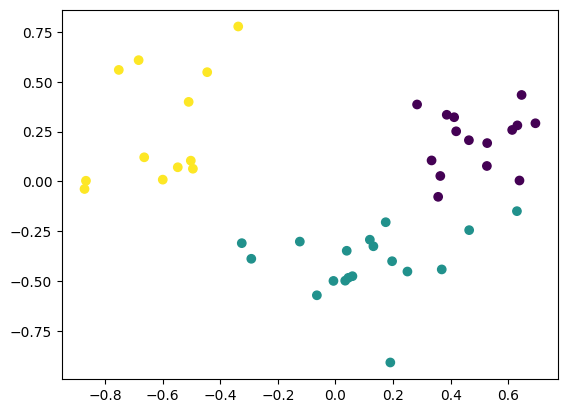

In [130]:
y_pred = knn1.predict(X_test)
_ = plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred)